In [14]:
import os, cv2, tensorflow as tf, numpy as np
from matplotlib import pyplot as plt
import imghdr

In [15]:
data_dir = 'data'
image_exts = ['jpeg','jpg','png','bmp']

In [16]:
for image_class in os.listdir(data_dir):
    if(image_class.endswith('.gitkeep')):
        continue
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
                
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)


In [17]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 580 files belonging to 2 classes.


In [18]:
data = data.map(lambda x,y: (x/255,y))

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
13/13 [==============================] - 11s 766ms/step - loss: 0.7852 - accuracy: 0.5673 - val_loss: 0.6636 - val_accuracy: 0.5391
Epoch 2/20
13/13 [==============================] - 10s 742ms/step - loss: 0.6115 - accuracy: 0.6082 - val_loss: 0.5832 - val_accuracy: 0.8047
Epoch 3/20
13/13 [==============================] - 10s 737ms/step - loss: 0.5425 - accuracy: 0.7452 - val_loss: 0.4488 - val_accuracy: 0.8750
Epoch 4/20
13/13 [==============================] - 10s 740ms/step - loss: 0.4467 - accuracy: 0.7957 - val_loss: 0.4380 - val_accuracy: 0.7812
Epoch 5/20
13/13 [==============================] - 10s 753ms/step - loss: 0.4371 - accuracy: 0.8245 - val_loss: 0.3858 - val_accuracy: 0.7891
Epoch 6/20
13/13 [==============================] - 11s 758ms/step - loss: 0.3804 - accuracy: 0.8293 - val_loss: 0.3912 - val_accuracy: 0.8281
Epoch 7/20
13/13 [==============================] - 10s 754ms/step - loss: 0.2943 - accuracy: 0.8678 - val_loss: 0.3232 - val_accuracy: 0.8359

In [24]:
model.save('sfw_nswf_identifier.h5')

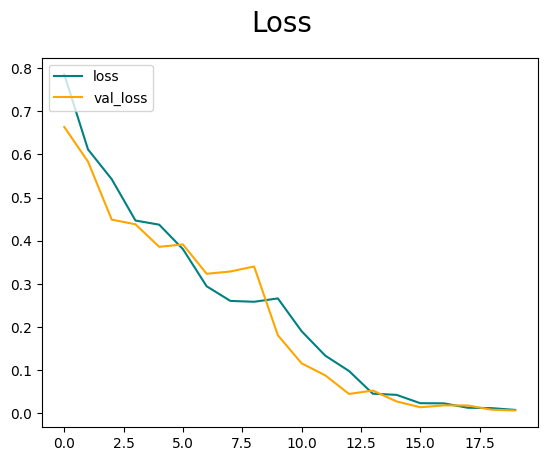

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

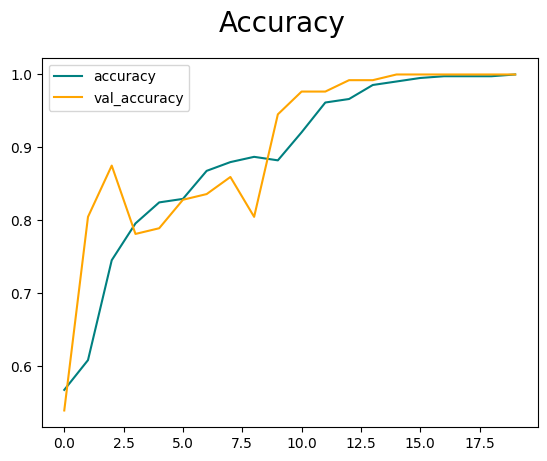

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()